In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

np.random.seed(2)


# Get data

In [46]:
df = pd.read_csv('data/wind.power/wtk_site_metadata.csv')
df.head()

,site_id,longitude,latitude,State,County,fraction_of_usable_area,power_curve,capacity,wind_speed,capacity_factor,full_timeseries_directory,full_timeseries_path
0,0,-117.147260,23.510410,Unknown,Unknown,1.0,offshore,16,6.07,0.169,0,0/0.nc
1,1,-93.946777,24.007446,Unknown,Unknown,1.0,offshore,16,7.43,0.302,0,0/1.nc
2,2,-97.482483,25.069138,Unknown,Unknown,1.0,offshore,16,8.19,0.375,0,0/2.nc
3,3,-97.463135,25.069443,Unknown,Unknown,1.0,offshore,16,8.19,0.375,0,0/3.nc
4,4,-97.443756,25.069763,Unknown,Unknown,1.0,offshore,16,8.19,0.376,0,0/4.nc


`Notes`

Why not use the full dataset instead of the metadata?

Using metadata instead of the full timeseries data is a common practice in machine learning projects, particularly when dealing with large datasets or when the focus is on feature selection and model training rather than analyzing every individual data point.

Here are some of the advantages of using metadata instead of the full dataset:

Efficiency: Processing and analysing the full time series data can be computationally expensive and time-consuming. Utilising metadata provides summary information and streamlines the analysis process.

Feature selection: By examining the metadata, relevant variables impacting wind power generation, such as capacity, wind speed, and capacity factor, can be identified for focused feature selection and model development.

Model training: Aggregating or summarising the timeseries data into meaningful features derived from metadata facilitates model training and prediction.

Data exploration: Exploring the dataset through metadata provides an overview of data characteristics, guides further analysis, and identifies potential issues or patterns.

Overall, using metadata reduces computational burden, aids in selecting relevant features, simplifies model development, and provides a preliminary understanding of the dataset before diving into full timeseries data analysis.

In [47]:
df.columns

Index(['site_id', 'longitude', 'latitude', 'State', 'County',
       'fraction_of_usable_area', 'power_curve', 'capacity', 'wind_speed',
       'capacity_factor', 'full_timeseries_directory', 'full_timeseries_path'],
      dtype='object')

`Notes`

These columns provide relevant information about the wind power generation sites, including their geographical location, capacity, wind speed measurements, and the availability of timeseries data for analysis:

1. site_id: Identifier for the wind power generation site.
2. longitude: Longitude coordinates of the site.
3. latitude: Latitude coordinates of the site.
4. State: State where the wind power generation site is located.
5. County: County where the wind power generation site is located.
6. fraction_of_usable_area: Fraction of the total area at the site that is suitable for wind power generation.
7. power_curve: The power curve associated with the wind turbine(s) at the site, which represents the relationship between wind speed and power output.
8. capacity: The capacity of the wind turbine(s) at the site, indicating the maximum power output they can generate.
9. wind_speed: Wind speed measurements recorded at the site.
10. capacity_factor: The ratio of actual power generated by the wind turbine(s) to their maximum capacity over a given period, typically expressed as a percentage.
11. full_timeseries_directory: Directory location of the full timeseries data.
12. full_timeseries_path: File path to access the full timeseries data.



In [48]:
df.drop(['site_id', 'full_timeseries_directory', 'full_timeseries_path'], axis=1, inplace=True)

`Notes`

Why did we drop those columns?

According to their descriptions, the columns "site_id," "full_timeseries_directory," and "full_timeseries_path" might be removed to simplify the dataset.

1. The'site_id' column, which merely acts as a unique identifier for wind power-producing locations, may be removed if deemed redundant.

2. If the 'full_timeseries_directory' and 'full_timeseries_path' columns are not necessary for the analysis or modelling tasks, they can be removed because they offer unnecessary file directory information.

By eliminating these columns, the dataset would be simplified without any extraneous or pointless data.


In [49]:
# view the dataset
df.head()

,longitude,latitude,State,County,fraction_of_usable_area,power_curve,capacity,wind_speed,capacity_factor
0,-117.147260,23.510410,Unknown,Unknown,1.0,offshore,16,6.07,0.169
1,-93.946777,24.007446,Unknown,Unknown,1.0,offshore,16,7.43,0.302
2,-97.482483,25.069138,Unknown,Unknown,1.0,offshore,16,8.19,0.375
3,-97.463135,25.069443,Unknown,Unknown,1.0,offshore,16,8.19,0.375
4,-97.443756,25.069763,Unknown,Unknown,1.0,offshore,16,8.19,0.376


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126692 entries, 0 to 126691
Data columns (total 9 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   longitude                126692 non-null  float64
 1   latitude                 126692 non-null  float64
 2   State                    126692 non-null  object 
 3   County                   126692 non-null  object 
 4   fraction_of_usable_area  126692 non-null  float64
 5   power_curve              126692 non-null  object 
 6   capacity                 126692 non-null  int64  
 7   wind_speed               126692 non-null  float64
 8   capacity_factor          126692 non-null  float64
dtypes: float64(5), int64(1), object(3)
memory usage: 8.7+ MB


`Notes`

The provided dataset is a Pandas DataFrame with 126,692 entries and 9 columns. It contains information about wind power generation sites, including their site identifiers, geographical coordinates, state and county locations, usable area fraction, power curve, capacity of wind turbines, wind speed measurements, and capacity factor. The dataset includes numerical (float64 and int64) and categorical (object) columns, representing various attributes of the wind power generation sites.

# Data Preprocessing

Handling missing values

In [51]:
# Checking and handling the null values in the dataset
df.isna().sum()

longitude                  0
latitude                   0
State                      0
County                     0
fraction_of_usable_area    0
power_curve                0
capacity                   0
wind_speed                 0
capacity_factor            0
dtype: int64

`Notes`

The fact that these columns have no missing values is a good indication that the data is well-curated and reliable. This is important for ensuring that the analysis of wind turbine performance is accurate and meaningful.

Encoding categorical variables

In [52]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder

# One-Hot Encoding

# convert categorical columns (State and County) into one-hot encoded columns
# by assigning binary values (1 or 0) to indicate the presence or absence of that category.
df_encoded_onehot = pd.get_dummies(df, columns=['State', 'County', 'power_curve'])

# Encode
label_encoder = LabelEncoder()
df_encoded_label = df.copy()
df_encoded_label['State'] = label_encoder.fit_transform(df['State'])
df_encoded_label['County'] = label_encoder.fit_transform(df['County'])
df_encoded_label['power_curve'] = label_encoder.fit_transform(df['power_curve'])

In [53]:
df_encoded_label

,longitude,latitude,State,County,fraction_of_usable_area,power_curve,capacity,wind_speed,capacity_factor
0,-117.147260,23.510410,42,1620,1.0,3,16,6.07,0.169
1,-93.946777,24.007446,42,1620,1.0,3,16,7.43,0.302
2,-97.482483,25.069138,42,1620,1.0,3,16,8.19,0.375
3,-97.463135,25.069443,42,1620,1.0,3,16,8.19,0.375
4,-97.443756,25.069763,42,1620,1.0,3,16,8.19,0.376
...,...,...,...,...,...,...,...,...,...
126687,-79.605350,22.871800,42,1620,1.0,3,16,7.50,0.308
126688,-81.438600,20.601960,42,1620,1.0,3,16,6.67,0.233
126689,-76.708770,23.735790,42,1620,1.0,3,16,7.22,0.285
126690,-79.004090,22.583120,42,1620,1.0,3,16,7.61,0.320


Scaling numerical features

To scale numerical features in the provided dataset, you can use various scaling techniques, such as Min-Max scaling or Standardization. 

But since the project is a timeseries, we intend to scale the numerical features while preserving the temporal order by using Min-max scaling.

In [54]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Min-Max Scaling
min_max_scaler = MinMaxScaler()
df_scaled_minmax = df_encoded_label.copy()
df_scaled_minmax[['longitude', 'latitude', 'fraction_of_usable_area', 'wind_speed', 'capacity_factor']] = min_max_scaler.fit_transform(df[['longitude', 'latitude', 'fraction_of_usable_area', 'wind_speed', 'capacity_factor']])

df_scaled_minmax

,longitude,latitude,State,County,fraction_of_usable_area,power_curve,capacity,wind_speed,capacity_factor
0,0.139154,0.112843,42,1620,1.0,3,16,0.359657,0.219904
1,0.513546,0.130136,42,1620,1.0,3,16,0.489058,0.433387
2,0.456489,0.167073,42,1620,1.0,3,16,0.561370,0.550562
3,0.456802,0.167084,42,1620,1.0,3,16,0.561370,0.550562
4,0.457114,0.167095,42,1620,1.0,3,16,0.561370,0.552167
...,...,...,...,...,...,...,...,...,...
126687,0.744977,0.090625,42,1620,1.0,3,16,0.495718,0.443018
126688,0.715393,0.011655,42,1620,1.0,3,16,0.416746,0.322632
126689,0.791720,0.120685,42,1620,1.0,3,16,0.469077,0.406100
126690,0.754680,0.080582,42,1620,1.0,3,16,0.506185,0.462279


In [69]:
df_scaled_minmax.columns

Index(['longitude', 'latitude', 'State', 'County', 'fraction_of_usable_area',
       'power_curve', 'capacity', 'wind_speed', 'capacity_factor'],
      dtype='object')

Feature engineering

Feature engineering is the process of creating new features from existing ones to enhance the predictive power of a machine learning model.

# EDA

In [70]:
# Create a subset of the dataframe with the specified columns
columns_to_explore = ['longitude', 'latitude', 'State', 'County', 'fraction_of_usable_area',
                      'power_curve', 'capacity', 'wind_speed', 'capacity_factor']

subset_df = df_scaled_minmax[columns_to_explore]


In [72]:
# Summary statistics
subset_df.describe()

,longitude,latitude,State,County,fraction_of_usable_area,power_curve,capacity,wind_speed,capacity_factor
count,126692.000000,126692.000000,126692.000000,126692.000000,126692.000000,126692.000000,126692.000000,126692.000000,126692.000000
mean,0.465506,0.679880,28.358649,962.905377,0.878635,1.470693,14.462397,0.503591,0.591574
std,0.206514,0.174472,13.904760,514.449476,0.225199,0.774248,3.222074,0.097137,0.124141
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,0.330946,0.562257,17.000000,531.000000,0.846600,1.000000,14.000000,0.454805,0.531300
50%,0.444744,0.716869,29.000000,940.000000,1.000000,1.000000,16.000000,0.508088,0.621188
75%,0.613318,0.804161,41.000000,1467.000000,1.000000,2.000000,16.000000,0.565176,0.677368
max,1.000000,1.000000,49.000000,1766.000000,1.000000,3.000000,16.000000,1.000000,1.000000


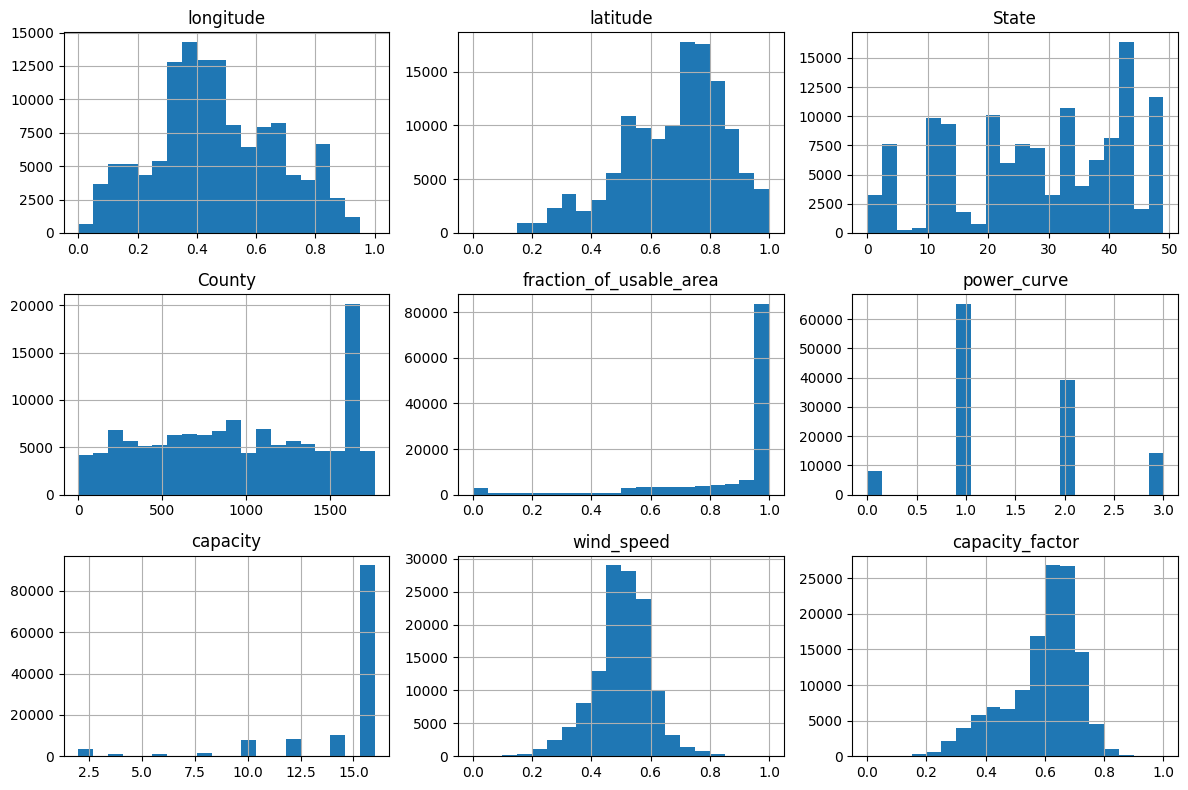

In [73]:
# Histograms
subset_df.hist(bins=20, figsize=(12, 8))
plt.tight_layout()
plt.show()

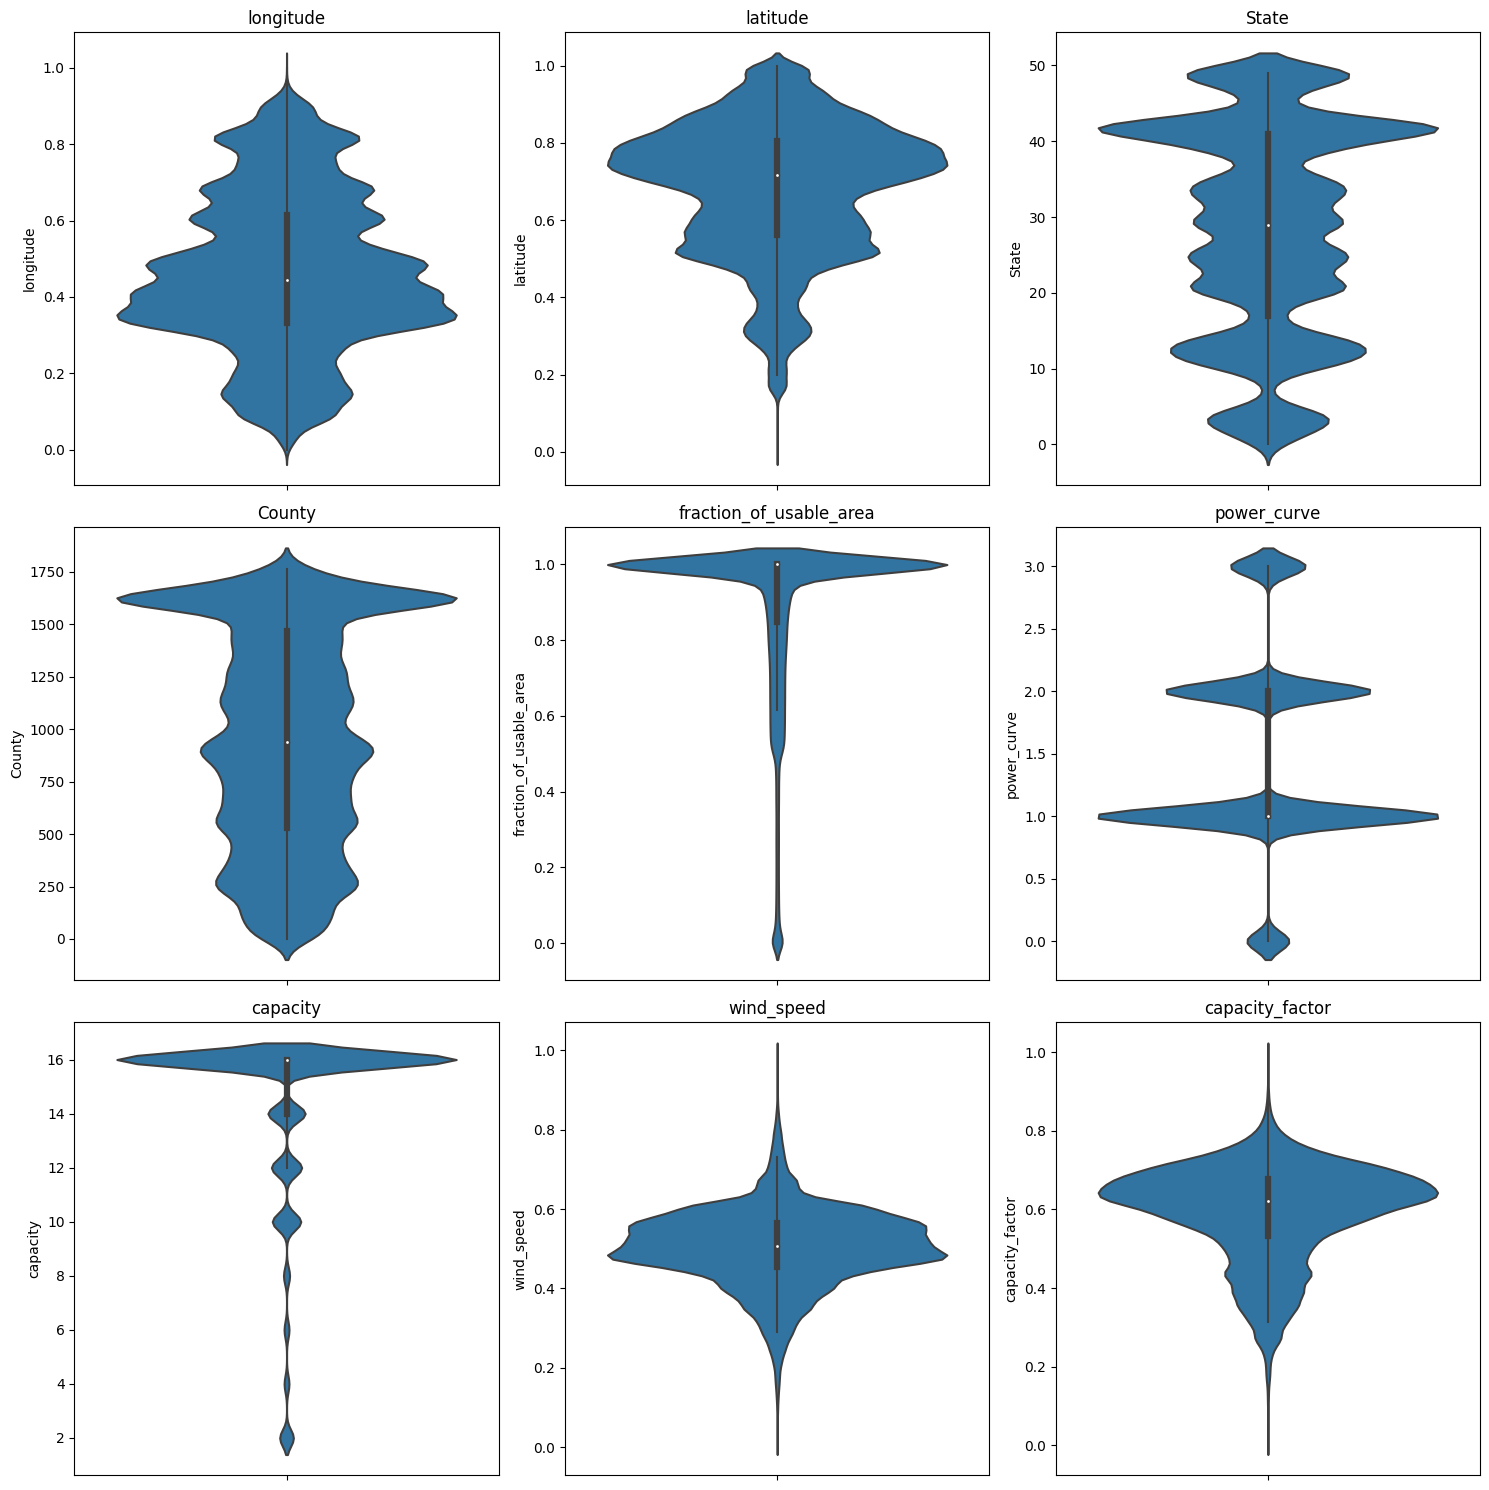

In [89]:
# Voilin Plots 

# Set up the subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

# Iterate over the columns and plot violin plots
for idx, column in enumerate(subset_df.columns):
    row_idx = idx // 3
    col_idx = idx % 3
    ax = axes[row_idx, col_idx]

    if subset_df[column].dtype == 'object':
        sns.violinplot(data=subset_df, x=column, y='capacity', ax=ax)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    else:
        sns.violinplot(data=subset_df, y=column, ax=ax)

    ax.set_title(column)
    ax.set_xlabel('')

# Adjust the layout and spacing
plt.tight_layout()

# Display the figure
plt.show()

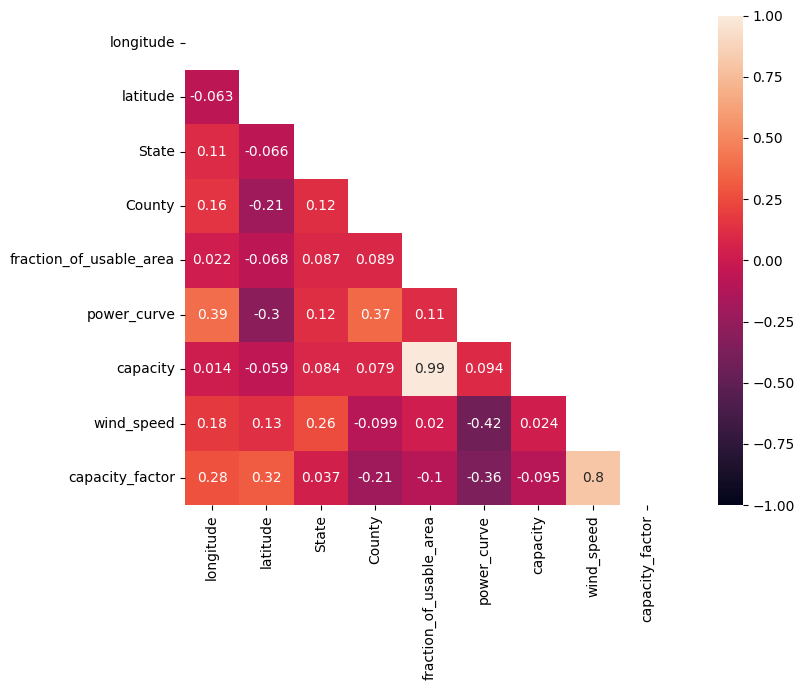

In [83]:
# Correlation heatmap
correlation = subset_df.corr()

# Fill diagonal and upper half with NaNs
mask = np.zeros_like(correlation, dtype=bool)
mask[np.triu_indices_from(mask)] = True
correlation[mask] = np.nan

f, ax = plt.subplots(figsize=(10,7))
sns.heatmap(correlation,annot=True, 
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax, )

plt.tight_layout()



`Notes`

The relationship between longitude and latitude is weakly negative (-0.062822), indicating that regions with greater longitudes typically have somewhat lower latitudes.

State and County: Positive correlations between the two variables suggest that particular counties are frequently linked to particular states. The connections have varying degrees of strength, with County and State exhibiting a stronger positive association than other variables.


Power Curve and Fraction of Usable Area: The power curve and the fraction of usable area have a positive association (0.110117). This shows that places with a higher percentage of usable land may have a more advantageous power curve for wind turbines.

Wind Speed and Capacity: Wind speed and capacity have a positive connection (0.177556). This implies that larger-capacity wind turbines may be linked to higher wind speeds.


Capacity Factor and Wind Speed: The capacity factor and wind speed have a high positive association (0.800888). This shows that the capacity factor of wind turbines is significantly influenced by wind speed.


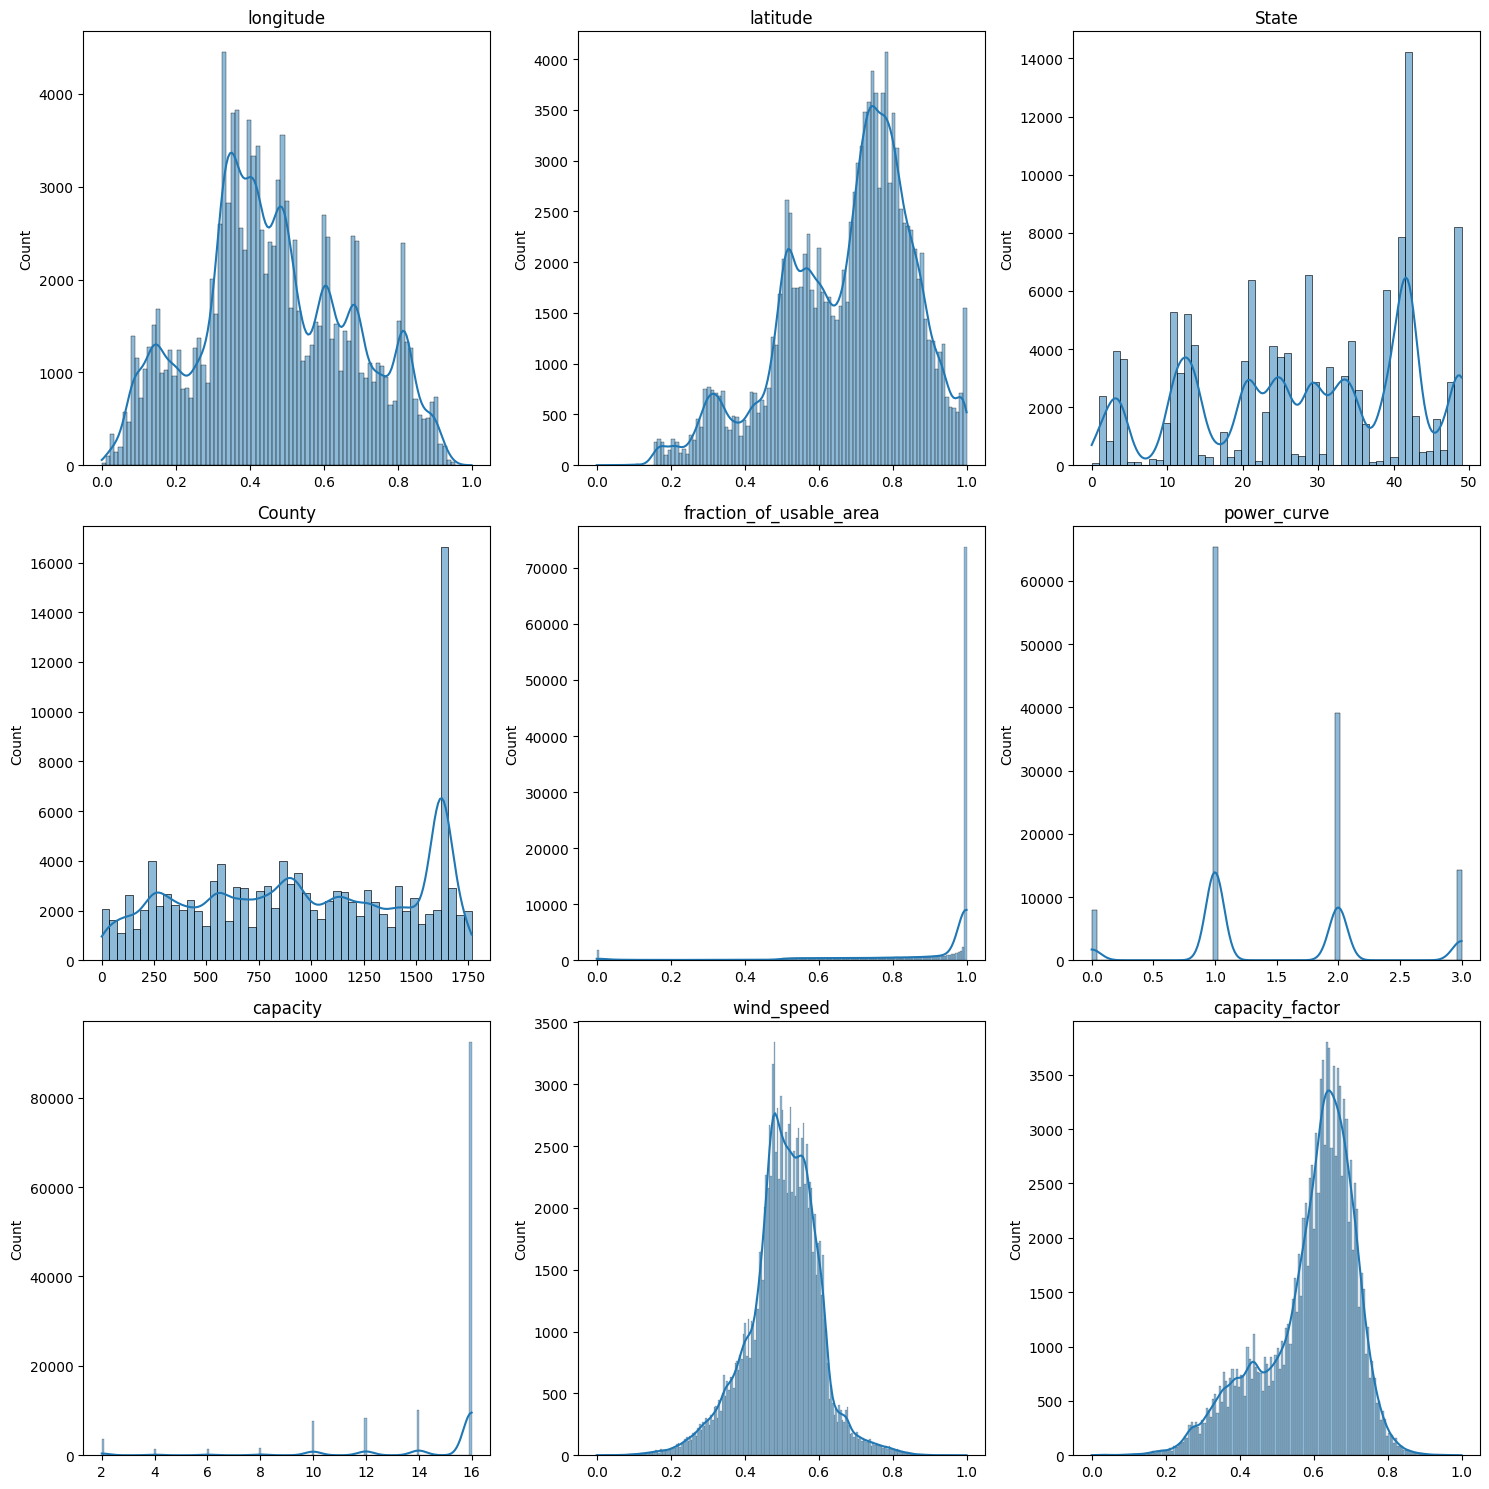

In [86]:
# Bar plots

# Set up the subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

# Iterate over the columns and plot bar plots or histograms
for idx, column in enumerate(subset_df.columns):
    row_idx = idx // 3
    col_idx = idx % 3
    ax = axes[row_idx, col_idx]

    if subset_df[column].dtype == 'object':
        sns.countplot(data=subset_df, x=column, ax=ax)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    else:
        sns.histplot(data=subset_df, x=column, kde=True, ax=ax)

    ax.set_title(column)
    ax.set_xlabel('')

# Adjust the layout and spacing
plt.tight_layout()

# Display the figure
plt.show()

For the time series plot, both "wind_speed" and "capacity_factor" can be good options depending on the insights you want to gain from the data. Here's a brief explanation of each variable and when it might be appropriate to plot:

Wind Speed:

    Wind speed measurements recorded at the site.
    Use wind speed if you want to visualize the variations in wind speed over time.
    This can help identify patterns, trends, or seasonal fluctuations in wind speed.
    It is particularly useful for understanding the availability and intensity of wind resources at the site.

Capacity Factor:

    The ratio of actual power generated by the wind turbine(s) to their maximum capacity over a given period, typically expressed as a percentage.
    Use the capacity factor if you want to analyze the efficiency or utilization of the wind turbines over time.
    This can help identify periods of high or low performance and understand the overall capacity utilization of the wind turbines.
    It provides insights into the actual power generation relative to the maximum potential power output.
    
Both wind speed and capacity factor can provide valuable insights into the performance and behavior of the wind turbines. 

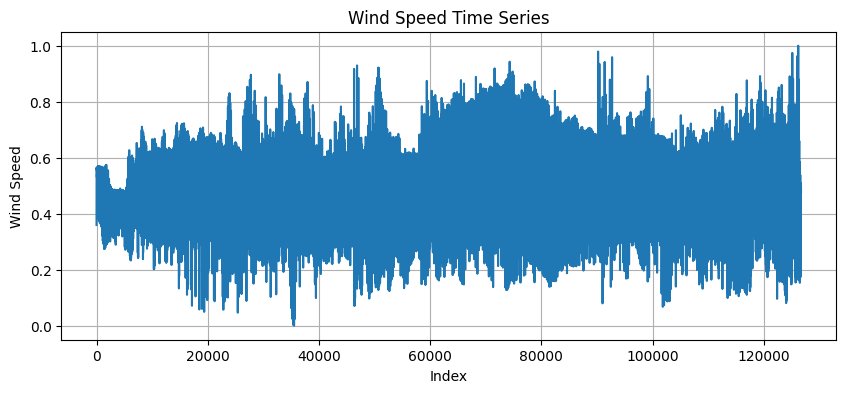

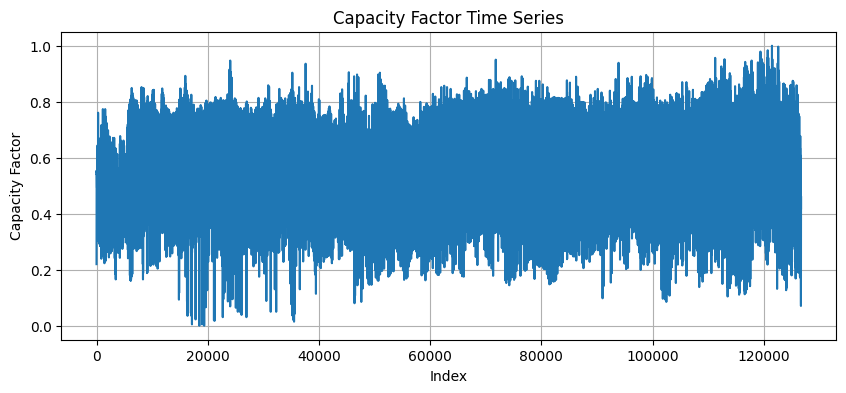

In [97]:
# Generate a numerical sequence as the x-axis
x = np.arange(len(subset_df))

# Plot wind speed as a time series
plt.figure(figsize=(10,4))
plt.plot(x, subset_df['wind_speed'])
plt.xlabel('Index')
plt.ylabel('Wind Speed')
plt.title('Wind Speed Time Series')
plt.grid(True)
plt.show()

# Plot capacity factor as a time series
plt.figure(figsize=(10,4))
plt.plot(x, subset_df['capacity_factor'])
plt.xlabel('Index')
plt.ylabel('Capacity Factor')
plt.title('Capacity Factor Time Series')
plt.grid(True)
plt.show()

`Notes`

For the "wind_speed" variable:

    The values of wind speed range from approximately 0.36 to 0.56.
    As the index increases, there are fluctuations in the wind speed values.
    However, the plot can still provide a sense of the relative changes in wind speed over the data sequence.

For the "capacity_factor" variable:

    The values of the capacity factor range from approximately 0.22 to 0.55.
    Similar to the wind speed, there are fluctuations in the capacity factor values as the index increases.
    However, the plot can still give an overview of the relative variations in the capacity factor throughout the data sequence.
    
    Though with the absence of explicit timestamps that limits ability to make precise temporal interpretations, the plot with the index as the x-axis still offered insights into the relative changes and trends in wind speed and capacity factor.

# ModellING

In [102]:
subset_df.columns

Index(['longitude', 'latitude', 'State', 'County', 'fraction_of_usable_area',
       'power_curve', 'capacity', 'wind_speed', 'capacity_factor'],
      dtype='object')

Feature selection

The stage of selecting the feature variables (X) and the target variable (y) is commonly known as "feature selection" or "variable selection." It is a crucial step in the machine learning pipeline where we can choose the subset of relevant features that will be used to train the models and predict the target variable accurately.

By carefully selecting the appropriate features, we aim to improve the model's performance, reduce overfitting, and enhance the interpretability of the results. Feature selection involves considering the relationships between the variables, their relevance to the prediction task, and any domain knowledge or insights that can guide the selection process.



To determine which variables to use as the feature variables (X) and the target variable (y) for the regression models, it is essential to understand the relationships and objectives of your prediction task. However, based on the provided columns, here are some suggestions:

Feature Variables (X):

    'longitude', 'latitude', 'State', 'County', and 'fraction_of_usable_area' can be used as geographic and site-specific features.
    'power_curve', 'capacity', and 'wind_speed' can be considered as the operational and environmental features.

Target Variable (y):

    'capacity_factor' can be used as the target variable since it represents the ratio of actual power generated to the maximum capacity of the wind turbine(s) over a given period.

Therefore, we choose the feature variables ('longitude', 'latitude', 'State', 'County', 'fraction_of_usable_area', 'power_curve', 'capacity', 'wind_speed') as X, and the target variable ('capacity_factor') as y.

In [103]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split


In [107]:
X = df_scaled_minmax[['longitude', 'latitude', 'State', 'County', 'fraction_of_usable_area', 'power_curve', 'capacity', 'wind_speed']]
y = df_scaled_minmax['capacity_factor']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


However, it was critical that I evaluate the project's specific requirements and trade-offs, such as interpretability and computational complexity, while selecting the optimum model.


However, it was critical that I evaluate the project's specific requirements and trade-offs, such as interpretability and computational complexity, while selecting the optimum model.


I investigated the coefficients or feature significance metrics produced by the models to determine their interpretability. I examined training and prediction times for computational complexity, especially when dealing with huge datasets or time limitations. Based on the individual goals and limits of a machine learning project, it is critical to find a balance between interpretability and complexity.


In [115]:
import time

In [132]:
# Linear regression model
linear_reg = LinearRegression()

# Measure the training time
start_time = time.time() # start time
linear_reg.fit(X_train, y_train)
linear_training_time = time.time() - start_time # end time

linear_reg_predictions = linear_reg.predict(X_test)

linear_reg_mse = mean_squared_error(y_test, linear_reg_predictions)
linear_reg_mae = mean_absolute_error(y_test, linear_reg_predictions)


# Print the evaluation metrics for each model
print("Linear Regression:")
print("Mean Squared Error:", linear_reg_mse)
print("Mean Absolute Error:", linear_reg_mae)

# Compare the training times
print("\nTraining Time Comparison:")
print("Linear Regression: {}s".format(linear_training_time))#round(linear_training_time*100, 2)))

Linear Regression:
Mean Squared Error: 0.0037255949569075498
Mean Absolute Error: 0.048822548646365364

Training Time Comparison:
Linear Regression: 0.0637969970703125s


`Notes`

Based on the results for the linear regression model:

Mean Squared Error (MSE): The MSE value of 0.0037 shows that the squared difference between the target variable's (capacity_factor) predicted and actual values is, on average, quite modest. The fact that the projected values are so close to the actual values implies that the linear regression model can predict wind power generation effectively.


The capacity_factor's absolute difference between the projected and actual values is, on average, just 0.0488, according to the measure of mean absolute error (MAE). Inferring that the projected values are reasonably close to the true values shows that the linear regression model has a low average absolute error.


The linear regression model is doing well in predicting wind power generation using the provided set of features, as evidenced by the minimal values for both MSE and MAE. It can accurately forecast the target variable (capacity_factor) by capturing the relationships between the independent variables (longitude, latitude, State, County, fraction_of_usable_area, power_curve, capacity, and wind_speed).


In [134]:
# Random forest regression model
rf_reg = RandomForestRegressor()

start_time = time.time()
rf_reg.fit(X_train, y_train)
random_forest_training_time = time.time() - start_time

rf_reg_predictions = rf_reg.predict(X_test)

rf_reg_mse = mean_squared_error(y_test, rf_reg_predictions)
rf_reg_mae = mean_absolute_error(y_test, rf_reg_predictions)

print("\nRandom Forest Regression:")
print("Mean Squared Error:", rf_reg_mse)
print("Mean Absolute Error:", rf_reg_mae)

# Compare the training times
print("\nTraining Time Comparison:")
print("Random Forest Regression: {}s".format(random_forest_training_time))#round(random_forest_training_time*100, 2)))


Random Forest Regression:
Mean Squared Error: 0.00017302056241326404
Mean Absolute Error: 0.006993916900948346

Training Time Comparison:
Random Forest Regression: 31.18556809425354s


`Notes`

The evaluation measures for Random Forest Regression are as follows:

Mean Squared Error (MSE): The MSE value of 0.000173 shows that the squared difference between the target variable's (capacity_factor) predicted and actual values is, on average, quite modest. This implies that the Random Forest Regression model may predict wind power generation accurately because the projected and real values are so closely matched.

The capacity_factor's absolute difference between the projected and actual values is, on average, relatively tiny, according to the MAE value of 0.007, which measures mean absolute error. This demonstrates the Random Forest Regression model's low average absolute error, demonstrating that the predicted values and true values are closely matched.


The Random Forest Regression model is demonstrating remarkable performance in predicting wind power generation using the provided set of features, as indicated by the modest values for both MSE and MAE. 

In [131]:
# Gradient boosting regression model
gb_reg = GradientBoostingRegressor()

start_time = time.time()
gb_reg.fit(X_train, y_train)
random_forest_training_time = time.time() - start_time

gb_reg_predictions = gb_reg.predict(X_test)

gb_reg_mse = mean_squared_error(y_test, gb_reg_predictions)
gb_reg_mae = mean_absolute_error(y_test, gb_reg_predictions)

print("\nGradient Boosting Regression:")
print("Mean Squared Error:", gb_reg_mse)
print("Mean Absolute Error:", gb_reg_mae)

# Compare the training times
print("\nTraining Time Comparison:")
print("Gradient Boosting Regression:{}s".format(random_forest_training_time))#round(random_forest_training_time*100, 2)))


Gradient Boosting Regression:
Mean Squared Error: 0.00044204432930054885
Mean Absolute Error: 0.014460106356671143

Training Time Comparison:
Gradient Boosting Regression:10.52329397201538s


`Notes`

The evaluation metrics supplied for gradient-boosting regression are as follows:

Mean Squared Error (MSE): The MSE value of 0.000442 shows that the squared difference between the target variable's (capacity_factor) predicted and actual values is, on average, quite minimal. This implies that the Gradient Boosting Regression model may predict wind power generation accurately because the projected and real values are so closely matched.


Mean Absolute Error (MAE): The MAE value of 0.01446 shows that the capacity_factor absolute difference between the anticipated and actual values is also, on average, quite tiny. Inferring that the projected values and true values are closely matched, this shows that the gradient-boosting regression model has a low average absolute error.


The Gradient Boosting Regression model is performing well in predicting wind power generation using the provided set of features, as evidenced by the tiny values for both MSE and MAE. Similar to Random Forest models, gradient boosting models are renowned for their capacity to manage complex relationships and generate precise forecasts.


Plot the Mean Squared Error (MSE) and Mean Absolute Error (MAE),

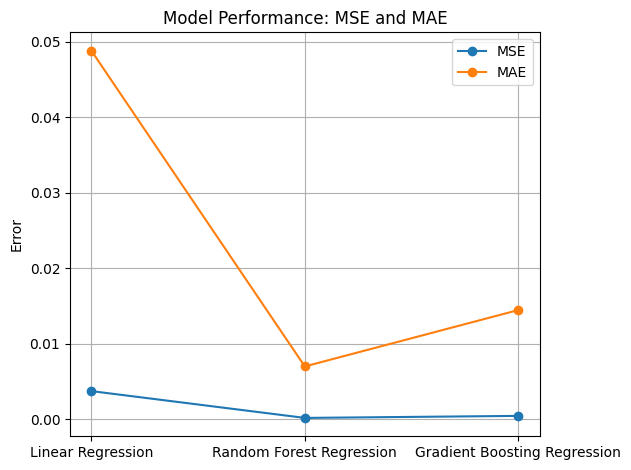

In [171]:
import matplotlib.pyplot as plt

# Set the labels for the x-axis
model_names = ['Linear Regression', 'Random Forest Regression', 'Gradient Boosting Regression']

# Define the mean squared errors
mse_values = [0.0037255949569075498, 0.00017302056241326404, 0.00044204432930054885]

# Define the mean absolute errors
mae_values = [0.048822548646365364, 0.006993916900948346, 0.014460106356671143]

# Set the position of the x-ticks
x_pos = range(len(model_names))

# Create the line plot for MSE
plt.plot(x_pos, mse_values, marker='o', label='MSE')

# Create the line plot for MAE
plt.plot(x_pos, mae_values, marker='o', label='MAE')

# Set the x-axis ticks and labels
plt.xticks(x_pos, model_names)#, rotation=45)

# Set the y-axis label
plt.ylabel('Error')

# Set the plot title
plt.title('Model Performance: MSE and MAE')

# Add a legend
plt.legend()

# Add a grid
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


`Notes`

With the lowest MSE and MAE values out of the three models, Random Forest Regression performed the best. The fact that the inaccuracy was greatly reduced shows that the expected and actual values of wind power generation are more closely aligned. The ensemble nature of this model and its capacity to identify intricate links in the data can be credited with its higher performance.


### Evaluating Trade-off of the 3 models.

Interpretability and computational complexity are important factors to consider when choosing a machine learning model. This project was assessed using the following aspects:

#### Interpretability:


    Linear Regression: Linear regression models are easy to understand. The model's coefficients represent the relationship and impact of each attribute on the target variable. Changes in the independent variables can readily be understood and explained in terms of how they affect the expected wind power generation.


    Random Forest Regression: When compared to linear models, random forest models are less interpretable. While they provide a measure of feature relevance, interpreting individual trees and their combined forecasts can be difficult.


    Gradient Boosting Regression: Gradient Boosting models, like Random Forests, are less interpretable because of their ensemble nature and the combination of numerous weak learners.


#### Computational Complexity:

    Linear regression models are computationally efficient and have a low level of complexity. When compared to ensemble approaches, training and prediction times are often faster.

    Random Forest Regression: Random Forest models are more computationally complex, particularly when a large number of trees are used. The training time grows as the number of trees and the data complexity increase.

    Gradient Boosting Regression models can be computationally costly, especially if the number of boosting iterations and data complexity are both high. When compared to linear regression, training times may be longer.


The coefficients or feature significance metrics can be analysed by the models to determine their interpretability. When dealing with huge datasets or time restrictions, we might consider training and prediction times for computational complexity. It is critical to achieve a balance between interpretability and complexity based on your project's individual requirements and limits.


##### Computational Complexity

The following are the findings of the training time comparison between the three models if we want to assess the computational complexity of the three models:

Linear Regression: With a training duration of roughly 0.06 seconds, linear regression has the quickest training time out of the three models. Due to their low computational complexity, linear regression models are effective and well suited for huge datasets or circumstances requiring quick training timeframes.


Random Forest Regression: With a training duration of roughly 31.19 seconds, random forest regression requires much more time to learn than linear regression. Multiple decision trees are created and combined in random forest models, which increases computational complexity. The intricacy of the data and the number of trees both affect how long training takes.


Gradient Boosting Regression: With a training time of roughly 10.52 seconds, gradient boosting regression has a training time that is both longer than linear regression and shorter than random forest regression. Gradient-boosting models have a moderately higher computational cost than linear regression since they create decision trees iteratively to enhance the model's performance.


Linear regression is the least computationally complex model, followed by gradient-boosting regression, while random forest regression is the most computationally complex.


Plot the computational complexity.

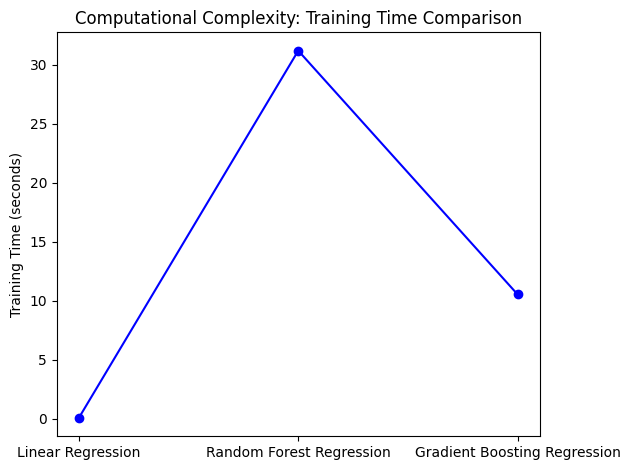

In [160]:
import matplotlib.pyplot as plt
import numpy as np

# Define the models and their training times
models = ['Linear Regression', 'Random Forest Regression', 'Gradient Boosting Regression']
training_times = [0.0637969970703125, 31.18556809425354, 10.52329397201538]

# Convert training times to numpy array
training_times = np.array(training_times)

# Set the figure size
# plt.figure(figsize=(8, 6))

# Plot the training times
plt.plot(models, training_times, marker='o', linestyle='-', color='b')

# Set the y-axis label
plt.ylabel('Training Time (seconds)')

# Set the plot title
plt.title('Computational Complexity: Training Time Comparison')

# Set x-axis tick labels rotation for better readability
# plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()


##### Interpretability


The interpretability of the three models can be assessed by examining the coefficients for linear regression and the feature importances for random forest regression and gradient boosting regression

To assess interpretability, we can examine the coefficients or feature importance measures provided by the models

`linear regression`

In [143]:
# Get the coefficients of the linear regression model
coefficients = linear_reg.coef_

# Print the feature coefficients
print("Linear Regression Coefficients:\n")
for feature, coefficient in zip(X_train.columns, coefficients):
    print(feature, ":", coefficient)
#     print()

Linear Regression Coefficients:

longitude : 0.10471501855183514
latitude : 0.14358840559720898
State : -0.0013846745888720612
County : -2.4521366657687215e-05
fraction_of_usable_area : -0.08596385996542563
power_curve : 0.005093202742953082
capacity : 0.0026309916748439638
wind_speed : 1.0101022943153384


`Notes`

The coefficients represent the size and direction of the association between each variable and expected wind power generation.

Positive coefficients for "longitude" and "latitude" indicate that greater values of these variables correspond to increasing wind power generation.

The variable "wind_speed" has the highest coefficient, indicating that it has a significant positive impact on wind energy generation.

Linear regression has a strong interpretability, providing clear and direct insights into the relationship between variables and the aim.


`random forest`


In [144]:

# Get the feature importances of the random forest model
importances = rf_reg.feature_importances_

# Print the feature importances
print("Random Forest Feature Importances:\n")
for feature, importance in zip(X_train.columns, importances):
    print(feature, ":", importance)


Random Forest Feature Importances:

longitude : 0.06905585701774668
latitude : 0.011559690282597302
State : 0.0015643972591472897
County : 0.0029544174769078778
fraction_of_usable_area : 0.01025938680456036
power_curve : 0.13886187298325245
capacity : 0.0006244372077839121
wind_speed : 0.7651199409680042


`Notes`

The feature importances reveal the relative importance of each variable in predicting wind power generation.
"Wind_speed" is identified as the most important feature, highlighting its significant impact on wind power generation.
The "power_curve" variable also plays a substantial role in the prediction.
Other factors that have a smaller impact on the prediction are "longitude," "latitude," and "fraction_of_usable_area".

Random forest regression offers a good balance between predictive performance and interpretability.


`gradient boosting`

In [146]:
# Get the feature importances of the gradient boosting model
importances = gb_reg.feature_importances_

# Print the feature importances
print("Gradient Boosting Feature Importances:\n")
for feature, importance in zip(X_train.columns, importances):
    print(feature, ":", importance)


Gradient Boosting Feature Importances:

longitude : 0.06262629911460824
latitude : 0.005907399210890977
State : 0.0010758684697867288
County : 0.0012046049719981295
fraction_of_usable_area : 0.009094174532076013
power_curve : 0.1588190921552828
capacity : 0.0
wind_speed : 0.7612725615453572


`Notes`

The feature importance scores demonstrate the relative importance of each variable in predicting wind power generation.

"Wind_speed" is identified as the most important feature, similar to random forest regression.

The "power_curve" variable also exhibits a significant impact on the prediction.

Other variables, including "longitude," "latitude," and "fraction_of_usable_area," contribute to the prediction, but their importance is relatively lower.

Gradient-boosting regression tends to capture complex relationships and interactions among variables, leading to higher predictive accuracy but lower interpretability compared to linear regression and random forest regression.


##### plot

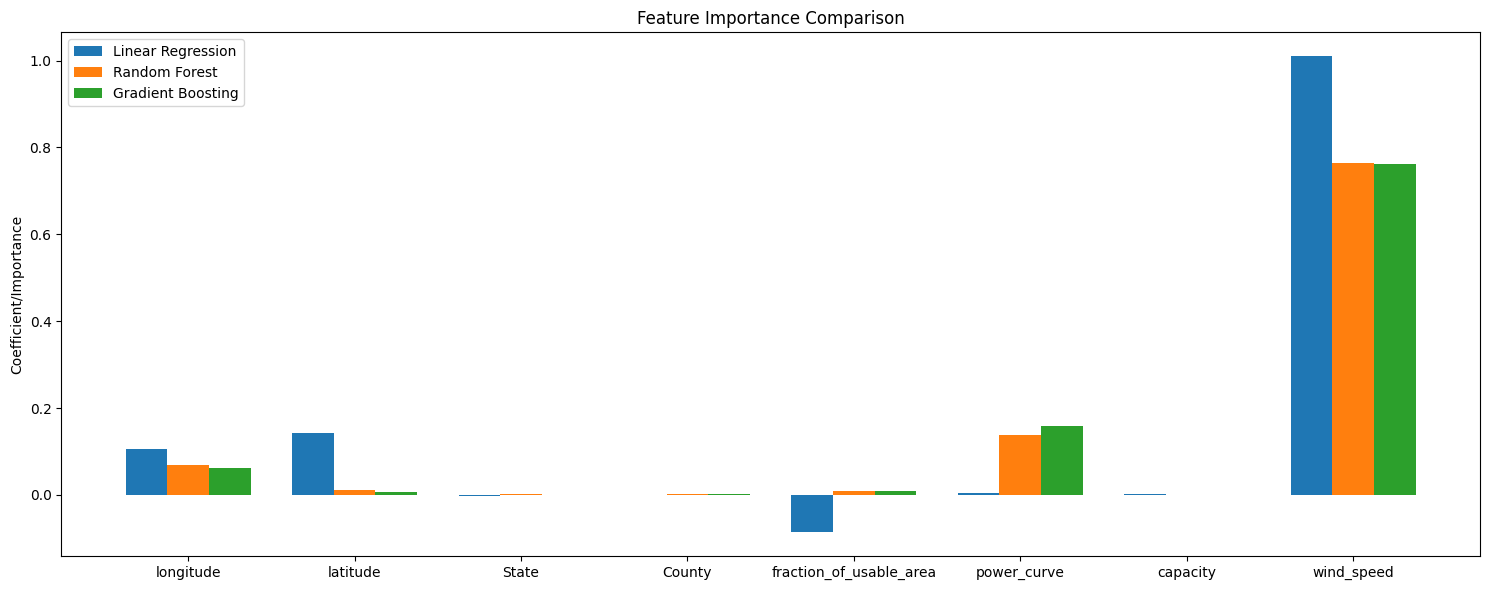

In [156]:
import matplotlib.pyplot as plt

# Define the variables and their respective coefficients/feature importances
variables = ['longitude', 'latitude', 'State', 'County', 'fraction_of_usable_area', 'power_curve', 'capacity', 'wind_speed']
linear_regression_coeffs = [0.10471501855183514, 0.14358840559720898, -0.0013846745888720612, -2.4521366657687215e-05, -0.08596385996542563, 0.005093202742953082, 0.0026309916748439638, 1.0101022943153384]
random_forest_importances = [0.06905585701774668, 0.011559690282597302, 0.0015643972591472897, 0.0029544174769078778, 0.01025938680456036, 0.13886187298325245, 0.0006244372077839121, 0.7651199409680042]
gradient_boosting_importances = [0.06262629911460824, 0.005907399210890977, 0.0010758684697867288, 0.0012046049719981295, 0.009094174532076013, 0.1588190921552828, 0.0, 0.7612725615453572]

# Set the width of the bars
bar_width = 0.25

# Set the x-axis positions
x_linear_regression = range(len(variables))
x_random_forest = [x + bar_width for x in x_linear_regression]
x_gradient_boosting = [x + 2 * bar_width for x in x_linear_regression]

# Set the figure size
plt.figure(figsize=(15, 6))

# Plot the coefficients/feature importances
plt.bar(x_linear_regression, linear_regression_coeffs, width=bar_width, label='Linear Regression')
plt.bar(x_random_forest, random_forest_importances, width=bar_width, label='Random Forest')
plt.bar(x_gradient_boosting, gradient_boosting_importances, width=bar_width, label='Gradient Boosting')

# Set the x-axis labels
plt.xticks([x + bar_width for x in range(len(variables))], variables)#, rotation=45)

# Set the y-axis label
plt.ylabel('Coefficient/Importance')

# Set the plot title
plt.title('Feature Importance Comparison')

# Add a legend
plt.legend()

plt.tight_layout()
# Display the plot
plt.show()


In summary, linear regression provides direct interpretations through coefficients, while random forest regression and gradient boosting regression offer insights through feature importances. Linear regression is highly interpretable but assumes linear relationships. Random forest regression balances interpretability and predictive performance, while gradient boosting regression excels in predictive accuracy but sacrifices some interpretability. 